# Dans ce projet, j’ai effectué un clustering non supervisé. 
# J’ai utilisé la réduction de dimensionnalité suivie d’un regroupement agglomératif. 
# J’ai mis au jour 4 clusters et les ai utilisés pour profiler les clients en clusters en fonction de leurs structures familiales et de leurs revenus / dépenses. 
# Cela peut être utilisé pour planifier de meilleures stratégies de marketing.

In [51]:
!pip install yellowbrick

You should consider upgrading via the 'c:\users\iatrade\anaconda3\python.exe -m pip install --upgrade pip' command.


In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mp
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics

In [3]:
data = pd.read_csv('cluster.csv', delimiter = '\t' )

In [4]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [5]:
# DIMENSSION DU DATASET
data.shape

(2240, 29)

In [6]:
# TYPES DES VARIABLES
data.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [7]:
# CHECK LES VALEURS MANQUANTE
data.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [8]:
# SUPPRIME LES VALEURS MANQUANTES
data = data.dropna(axis = 0)
data.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [9]:
# DIMENSSION DU NOUVEAU DATASET
data.shape

(2216, 29)

In [10]:
data['Marital_Status'].value_counts()

Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [11]:
data['Education'].value_counts()

Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64

In [12]:
# INDIQUER QUE LA COLONE 'Dt_Customer' EST DE TYPE DATE
data['Dt_Customer']=pd.to_datetime(data['Dt_Customer'],format = '%d-%m-%Y')

In [13]:
data.dtypes

ID                              int64
Year_Birth                      int64
Education                      object
Marital_Status                 object
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
AcceptedCmp3                    int64
AcceptedCmp4                    int64
AcceptedCmp5                    int64
AcceptedCmp1                    int64
AcceptedCmp2                    int64
Complain                        int64
Z_CostContac

In [14]:
# DEFINITION DES METRICS DE BASE POUR LA SEGMENTATION

In [15]:
# CREATION DE VARIABLE DE METRICS
# -- DEPENSSIER (3 CLASSES)
# -- ANCIEN_OU_VOUVEAU (3 CLASSES)
# -- POTENTIEL (3 CLASSES)
# -- NOMBRE D'ENFANTS
# -- AGE DU CLIENT
# -- VIE SEUL ?
# -- NIVEAU ACADEMIQUE

## Création d'une variable 'ANCIEN_OU_VOUVEAU' qui mesure l'ancienete du client

In [16]:
# Liste des dates d'enregistrement

dates = []
for i in data["Dt_Customer"]:
    i = i.date()
    dates.append(i)
print('Le premier client est enregistré le : ', min(dates) )
print('Le dernier client est enregistré le : ', max(dates) )

Le premier client est enregistré le :  2012-07-30
Le dernier client est enregistré le :  2014-06-29


In [17]:
# Le nombre de jour qu'un clients a passé sur la plateforme par rapport au dernier venu

days = []
d_1 = max(dates) #le dernier client à s'etre enregistré
for i in dates:
    delta = d_1 - i
    days.append(delta)
data["ANCIEN_OU_NOUVEAU"] = days
data["ANCIEN_OU_NOUVEAU"] = pd.to_numeric(data["ANCIEN_OU_NOUVEAU"], errors="coerce")

In [18]:
# L'AGE DU CLIENT

data["Age"] = 2021-data["Year_Birth"]

In [19]:
# Vie seul ou à 2

data["vie_seul_?"]=data["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})

In [20]:
# DEPENSSIER

data["depense"] = data["MntWines"]+ data["MntFruits"]+ data["MntMeatProducts"]+ data["MntFishProducts"]+ data["MntSweetProducts"]+ data["MntGoldProds"]

In [21]:
# NOMBRE D'ENFANTS

data["nb_enfants"]=data["Kidhome"]+data["Teenhome"]

In [22]:
# TAILLE DE LA FAMILLE

data["taille_famille"] = data["vie_seul_?"].replace({"Alone": 1, "Partner":2})+ data["nb_enfants"]

In [23]:
# NIVEAU ACADEMIQUE


data["Education"]=data["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

In [24]:
# PARENT ?

data["Parent ?"] = np.where(data.nb_enfants> 0, 1, 0)

In [25]:
# SUPPRESSION DE COLONES JUGE NON NECESSAIRE

suppr_col = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
data = data.drop(suppr_col, axis=1)

In [26]:
data.head()

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,AcceptedCmp2,Complain,Response,ANCIEN_OU_NOUVEAU,Age,vie_seul_?,depense,nb_enfants,taille_famille,Parent ?
0,Graduate,58138.0,0,0,58,635,88,546,172,88,...,0,0,1,57283200000000000,64,Alone,1617,0,1,0
1,Graduate,46344.0,1,1,38,11,1,6,2,1,...,0,0,0,9763200000000000,67,Alone,27,2,3,1
2,Graduate,71613.0,0,0,26,426,49,127,111,21,...,0,0,0,26956800000000000,56,Partner,776,0,2,0
3,Graduate,26646.0,1,0,26,11,4,20,10,3,...,0,0,0,12009600000000000,37,Partner,53,1,3,1
4,Postgraduate,58293.0,1,0,94,173,43,118,46,27,...,0,0,0,13910400000000000,40,Partner,422,1,3,1


In [28]:
data['ANCIEN_OU_NOUVEAU_r'] = data['ANCIEN_OU_NOUVEAU'] / 86400

In [29]:
data.head()

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Complain,Response,ANCIEN_OU_NOUVEAU,Age,vie_seul_?,depense,nb_enfants,taille_famille,Parent ?,ANCIEN_OU_NOUVEAU_r
0,Graduate,58138.0,0,0,58,635,88,546,172,88,...,0,1,57283200000000000,64,Alone,1617,0,1,0,6.630000e+11
1,Graduate,46344.0,1,1,38,11,1,6,2,1,...,0,0,9763200000000000,67,Alone,27,2,3,1,1.130000e+11
2,Graduate,71613.0,0,0,26,426,49,127,111,21,...,0,0,26956800000000000,56,Partner,776,0,2,0,3.120000e+11
3,Graduate,26646.0,1,0,26,11,4,20,10,3,...,0,0,12009600000000000,37,Partner,53,1,3,1,1.390000e+11
4,Postgraduate,58293.0,1,0,94,173,43,118,46,27,...,0,0,13910400000000000,40,Partner,422,1,3,1,1.610000e+11


<Figure size 432x288 with 0 Axes>

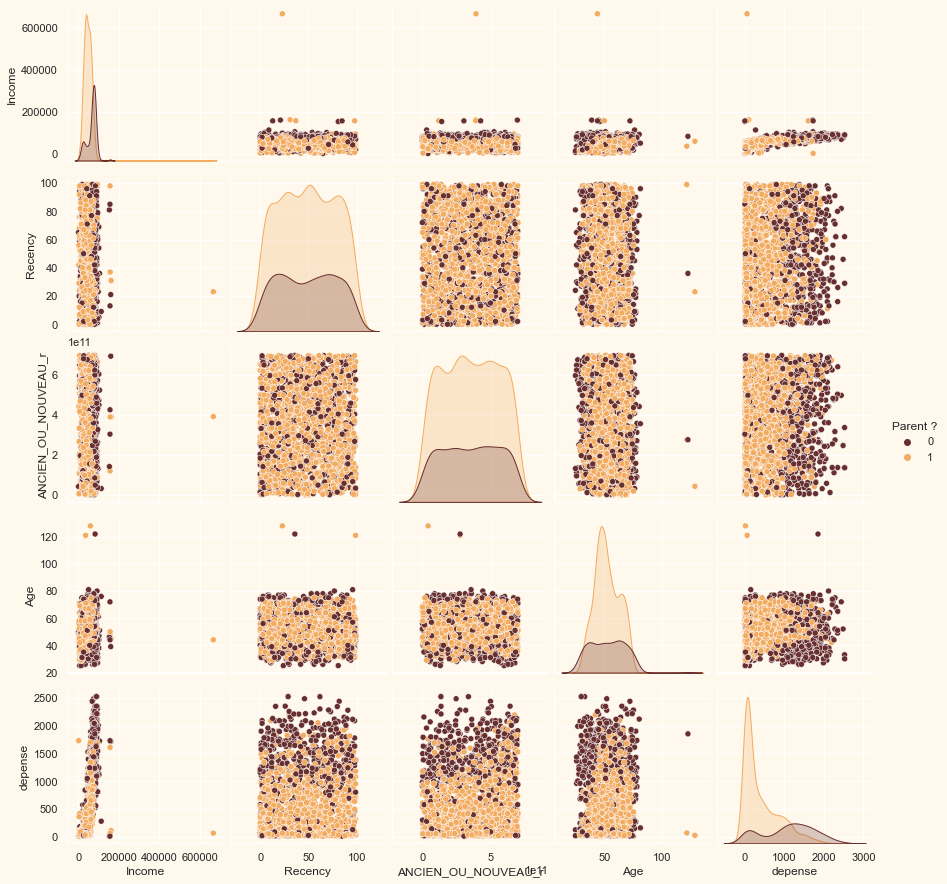

In [30]:
# VISUALISATION DE CERTAINE VARIABLE

#configuration couleur
sns.set(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})
pallet = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
cmap = mp.colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])
#visualisation
To_Plot = [ "Income", "Recency", "ANCIEN_OU_NOUVEAU_r", "Age", "depense", "Parent ?"]
#print("Reletive Plot Of Some Selected Features: A Data Subset")
plt.figure()
sns.pairplot(data[To_Plot], hue= "Parent ?",palette= (["#682F2F","#F3AB60"]))

plt.show()

Ooops des valeurs abérantes, qu'on va supprimer biensûre

In [31]:
data = data[(data["Age"]<90)]
data = data[(data["Income"]<150000)]
print("Apres suppression il nous reste :", len(data))

Apres suppression il nous reste : 2205


<Figure size 432x288 with 0 Axes>

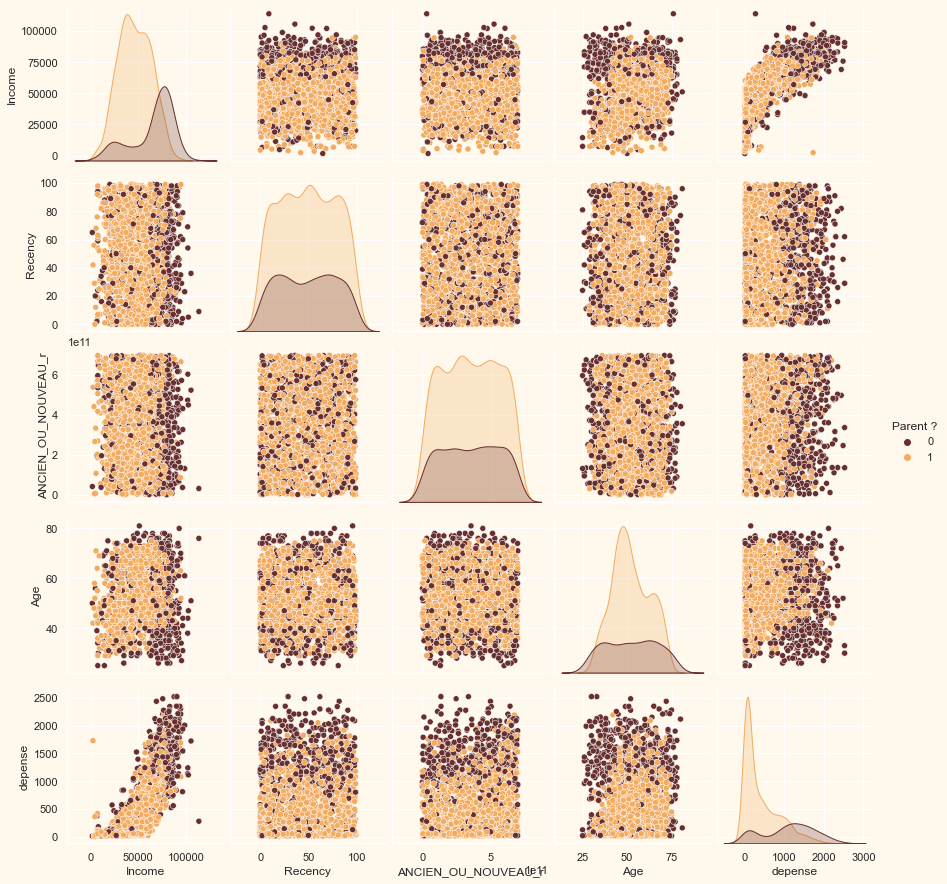

In [32]:
plt.figure()
sns.pairplot(data[To_Plot], hue= "Parent ?",palette= (["#682F2F","#F3AB60"]))

plt.show()

On observe la distribution des variables en du fait que le client soit parent ou pas

## EVALUATION DES CORRELATIONS ENTRE LES VARIABLES

<AxesSubplot:>

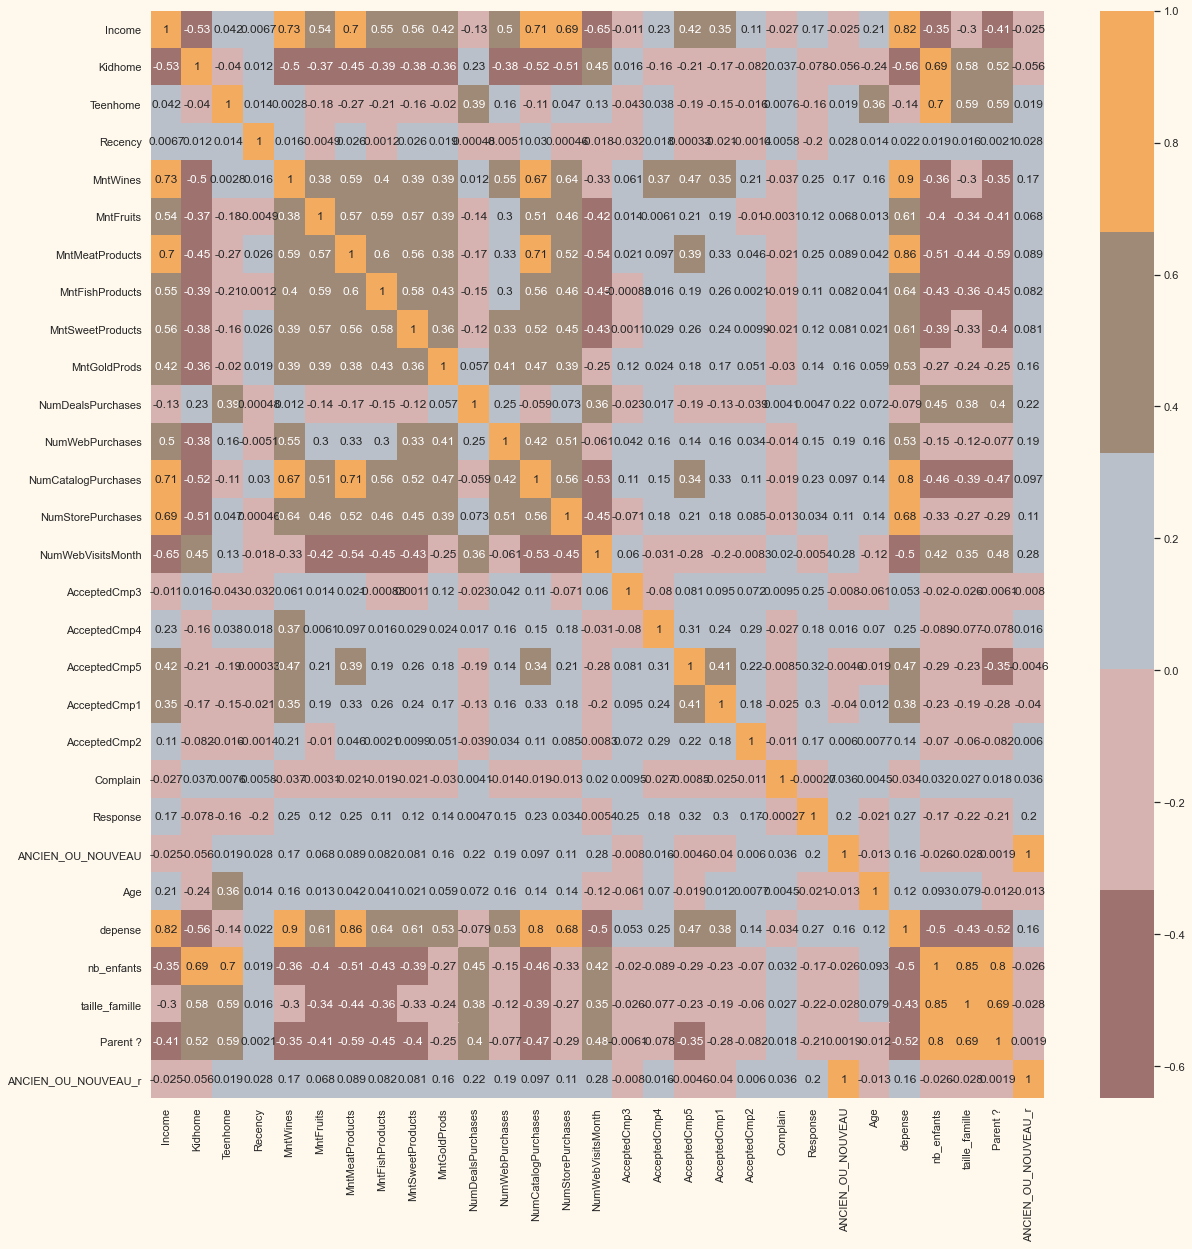

In [33]:
# MATRICE DE CORRELATION

mat_corr= data.corr()
plt.figure(figsize=(20,20))  
sns.heatmap(mat_corr, annot=True, cmap=cmap, center=0)

In [34]:
s = (data.dtypes == 'object')
object_cols = list(s[s].index)

In [35]:
encod=LabelEncoder()
for i in object_cols:
    data[i]=data[[i]].apply(encod.fit_transform)
    
print("encodage effectué")

encodage effectué


In [36]:
df = data.copy()
df.head()

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Complain,Response,ANCIEN_OU_NOUVEAU,Age,vie_seul_?,depense,nb_enfants,taille_famille,Parent ?,ANCIEN_OU_NOUVEAU_r
0,0,58138.0,0,0,58,635,88,546,172,88,...,0,1,57283200000000000,64,0,1617,0,1,0,6.630000e+11
1,0,46344.0,1,1,38,11,1,6,2,1,...,0,0,9763200000000000,67,0,27,2,3,1,1.130000e+11
2,0,71613.0,0,0,26,426,49,127,111,21,...,0,0,26956800000000000,56,1,776,0,2,0,3.120000e+11
3,0,26646.0,1,0,26,11,4,20,10,3,...,0,0,12009600000000000,37,1,53,1,3,1,1.390000e+11
4,1,58293.0,1,0,94,173,43,118,46,27,...,0,0,13910400000000000,40,1,422,1,3,1,1.610000e+11


In [37]:
cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
df = df.drop(cols_del, axis=1)

In [40]:
# Standardisatin des données

scaler = StandardScaler()
scaler.fit(df)
scal_df = pd.DataFrame(scaler.transform(df),columns= df.columns )
print("Les données sont standardisées")

Les données sont standardisées


In [41]:
# Le dataset nettoyé et pretraité pour le model de cluster

scal_df.head()

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumStorePurchases,NumWebVisitsMonth,ANCIEN_OU_NOUVEAU,Age,vie_seul_?,depense,nb_enfants,taille_famille,Parent ?,ANCIEN_OU_NOUVEAU_r
0,-0.892338,0.314651,-0.823405,-0.930767,0.310830,0.974566,1.548614,1.748400,2.449154,1.480301,...,-0.562650,0.689203,1.527183,1.017189,-1.347625,1.679323,-1.266589,-1.759012,-1.58466,1.527183
1,-0.892338,-0.254877,1.038757,0.906602,-0.380600,-0.874776,-0.638664,-0.731678,-0.652345,-0.635399,...,-1.179732,-0.139645,-1.188629,1.273530,-1.347625,-0.963897,1.403420,0.448513,0.63105,-1.188629
2,-0.892338,0.965354,-0.823405,-0.930767,-0.795458,0.355155,0.568110,-0.175957,1.336263,-0.149031,...,1.288596,-0.554069,-0.205999,0.333612,0.742046,0.281242,-1.266589,-0.655250,-1.58466,-0.205999
3,-0.892338,-1.206087,1.038757,-0.930767,-0.795458,-0.874776,-0.563241,-0.667380,-0.506392,-0.586763,...,-0.562650,0.274779,-1.060245,-1.289883,0.742046,-0.920675,0.068415,0.448513,0.63105,-1.060245
4,0.571654,0.322136,1.038757,-0.930767,1.555404,-0.394659,0.417263,-0.217292,0.150396,-0.003121,...,0.054432,-0.139645,-0.951612,-1.033542,0.742046,-0.307248,0.068415,0.448513,0.63105,-0.951612


In [42]:
scal_df = scal_df.drop('ANCIEN_OU_NOUVEAU', axis = 1)

In [43]:
scal_df.head()

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,vie_seul_?,depense,nb_enfants,taille_famille,Parent ?,ANCIEN_OU_NOUVEAU_r
0,-0.892338,0.314651,-0.823405,-0.930767,0.310830,0.974566,1.548614,1.748400,2.449154,1.480301,...,2.628526,-0.562650,0.689203,1.017189,-1.347625,1.679323,-1.266589,-1.759012,-1.58466,1.527183
1,-0.892338,-0.254877,1.038757,0.906602,-0.380600,-0.874776,-0.638664,-0.731678,-0.652345,-0.635399,...,-0.588043,-1.179732,-0.139645,1.273530,-1.347625,-0.963897,1.403420,0.448513,0.63105,-1.188629
2,-0.892338,0.965354,-0.823405,-0.930767,-0.795458,0.355155,0.568110,-0.175957,1.336263,-0.149031,...,-0.230646,1.288596,-0.554069,0.333612,0.742046,0.281242,-1.266589,-0.655250,-1.58466,-0.205999
3,-0.892338,-1.206087,1.038757,-0.930767,-0.795458,-0.874776,-0.563241,-0.667380,-0.506392,-0.586763,...,-0.945440,-0.562650,0.274779,-1.289883,0.742046,-0.920675,0.068415,0.448513,0.63105,-1.060245
4,0.571654,0.322136,1.038757,-0.930767,1.555404,-0.394659,0.417263,-0.217292,0.150396,-0.003121,...,0.126750,0.054432,-0.139645,-1.033542,0.742046,-0.307248,0.068415,0.448513,0.63105,-0.951612


### L’analyse en composantes principales (APC) est une technique
### permettant de réduire la dimensionnalité de ces ensembles de données,
### d’accroître l’interprétabilité tout en minimisant la perte d’informations.

In [47]:
# Nous reduirons la dimenssion à 3

pca = PCA(n_components=3)
pca.fit(scal_df)
PCA_df = pd.DataFrame(pca.transform(scal_df), columns=(["col1","col2", "col3"]))
PCA_df.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2205.0,-1.446059e-16,2.902887,-6.056712,-2.564458,-0.784505,2.413093,7.518038
col2,2205.0,7.482047e-17,1.715289,-4.197443,-1.326111,-0.175911,1.235168,6.190906
col3,2205.0,4.972087e-18,1.231034,-3.639323,-0.857316,-0.058946,0.853724,6.887401


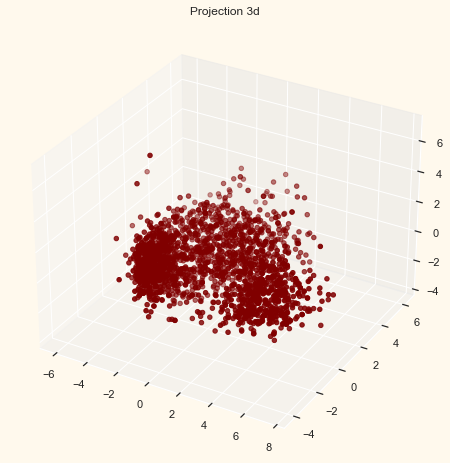

In [49]:
# Projection en 3d

x = PCA_df["col1"]
y = PCA_df["col2"]
z = PCA_df["col3"]

# Visualisation

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("Projection 3d")
plt.show()

# CLUSTERING

- Méthode Elbow pour déterminer le nombre de grappes à former
- Clustering via Clustering agglomératif
- Examen des amas formés via un nuage de points

Méthode Elbow pour déterminer le nombre de grappes à former:


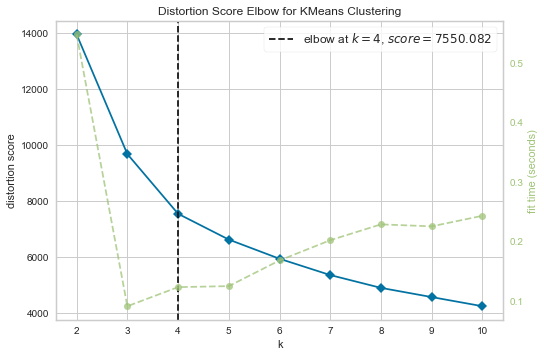

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [57]:
print('Méthode Elbow pour déterminer le nombre de grappes à former:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_df)
Elbow_M.show()

- La cellule ci-dessus indique que quatre (4) sera un nombre optimal de clusters pour ces données. 
- Ensuite, nous adapterons le modèle de clustering agglomératif pour obtenir les clusters finaux.

In [61]:
# Model de cluster par agglomeration

AC = AgglomerativeClustering(n_clusters=4)

# entrainement et prediction du model de cluster
yhat_AC = AC.fit_predict(PCA_df)
PCA_df["Clusters"] = yhat_AC

#Ajout de la variable cluster au dataframe.
data["Clusters"]= yhat_AC

Pour examiner les clusters formés, jetons un coup d’œil à la distribution 3D des clusters.

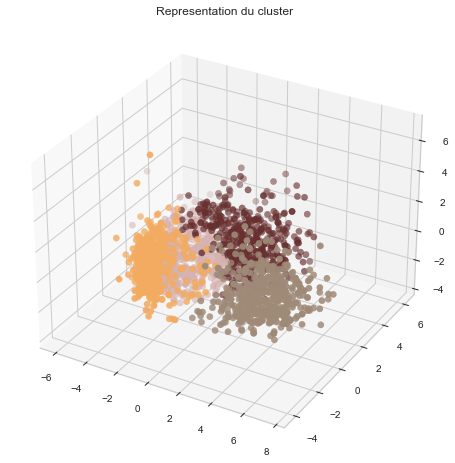

In [62]:
# Representation du cluster
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_df["Clusters"], marker='o', cmap = cmap )
ax.set_title("Representation du cluster")
plt.show()

## Evaluation du model

Puisqu’il s’agit d’un clustering non supervisé. Nous n’avons pas de fonctionnalité balisée pour évaluer ou noter notre modèle.
Le but de cette section est d’étudier les modèles dans les grappes formées et de déterminer la nature des modèles des grappes.

Pour cela, nous examinerons les données à la lumière des grappes via une analyse exploratoire 
des données et en tirant des conclusions.

- Tout d’abord, jetons un coup d’œil à la distribution de groupe de clustring

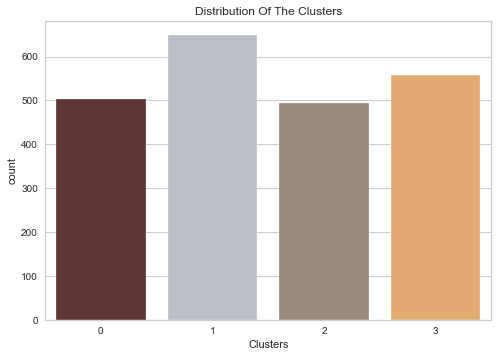

In [63]:
# representation du nombre d'individus dans chaque grappe 

pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=data["Clusters"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

Les grappes semblent être assez réparties.

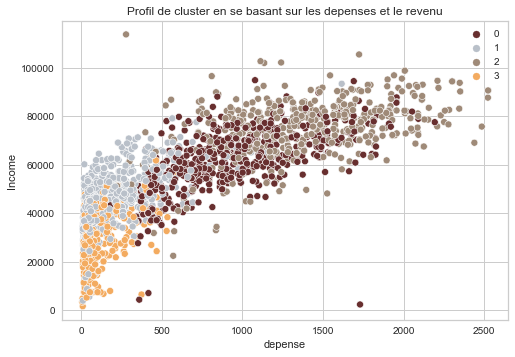

In [66]:
pl = sns.scatterplot(data = data,x=data["depense"], y=data["Income"],hue=data["Clusters"], palette= pal)
pl.set_title("Profil de cluster en se basant sur les depenses et le revenu")
plt.legend()
plt.show()

- group 0: high spending & average income
- group 1: high spending & high income
- group 2: low spending & low income
- group 3: high spending & low income

Ensuite, il nous faut examiner la distribution détaillée des grappes selon les différents produits dans les données.
À savoir: Vins, Fruits, Viande, Poisson, Bonbons et Or

C:\Users\iatrade\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 19.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\iatrade\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 61.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\iatrade\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 8.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\iatrade\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 74.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


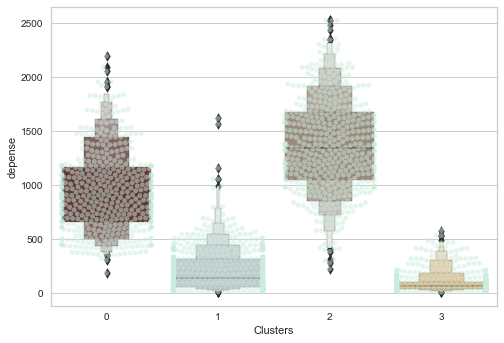

In [68]:
plt.figure()
pl=sns.swarmplot(x=data["Clusters"], y=data["depense"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=data["Clusters"], y=data["depense"], palette=pal)
plt.show()

D’après le graphique ci-dessus, on peut clairement voir que le cluster 2 est notre plus grand ensemble de clients, 
suivi de près par le cluster 0. 
Nous pouvons explorer ce que chaque grappe dépense pour les stratégies de marketing ciblées.

### Explorons ensuite comment nos campagnes se sont comportées dans le passé.

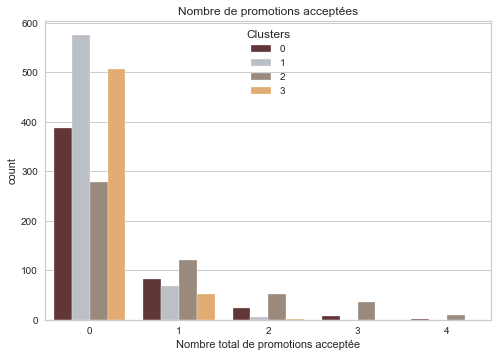

In [69]:
#Creation de variable qui prend la somme des promotions acceptées 
data["Total_Promos"] = data["AcceptedCmp1"]+ data["AcceptedCmp2"]+ data["AcceptedCmp3"]+ data["AcceptedCmp4"]+ data["AcceptedCmp5"]

#Representation des campagnes acceptées
plt.figure()
pl = sns.countplot(x=data["Total_Promos"],hue=data["Clusters"], palette= pal)
pl.set_title("Nombre de promotions acceptées")
pl.set_xlabel("Nombre total de promotions acceptée")
plt.show()

- Il n’y a pas eu de réponse écrasante aux campagnes jusqu’à présent. 
- Très peu de participants dans l’ensemble. De plus, personne ne participe à l’ensemble des 5 d’entre eux. 
- Peut-être que des campagnes mieux ciblées et bien planifiées sont nécessaires pour stimuler les ventes.

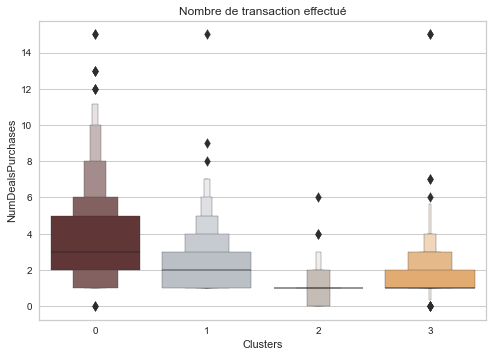

In [70]:
# Tracer le nombre de transactions achetées

plt.figure()
pl=sns.boxenplot(y=data["NumDealsPurchases"],x=data["Clusters"], palette= pal)
pl.set_title("Nombre de transaction effectué")
plt.show()

- Contrairement aux campagnes, les offres proposées ont bien fonctionné. Il a les meilleurs résultats avec les clusters 0 et 3. 
- Cependant, nos clients vedettes du groupe 1 ne sont pas beaucoup dans les offres. 
- Rien ne semble attirer massivement le cluster 2 

<Figure size 576x396 with 0 Axes>

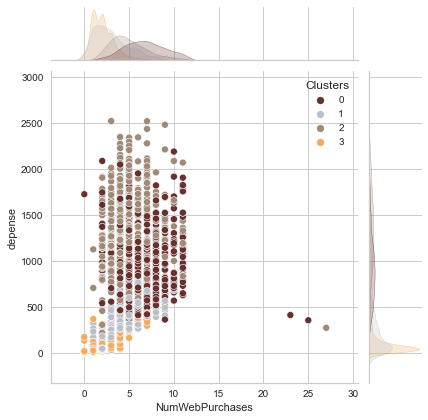

<Figure size 576x396 with 0 Axes>

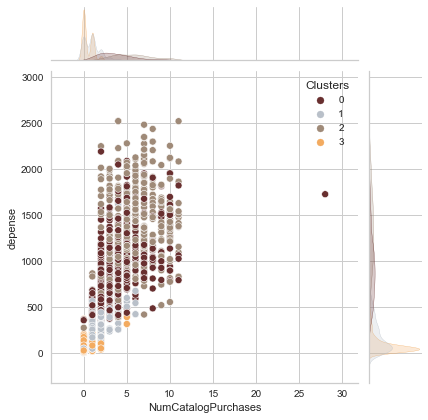

<Figure size 576x396 with 0 Axes>

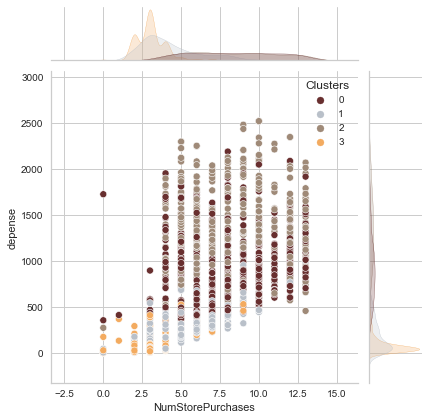

<Figure size 576x396 with 0 Axes>

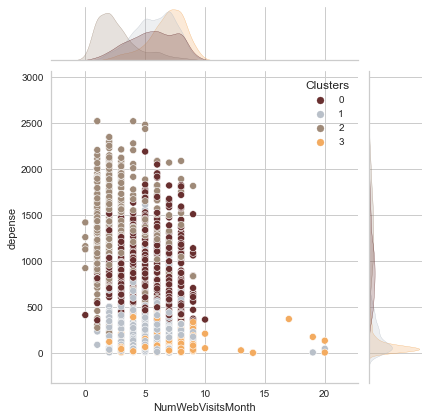

In [73]:
#Plus de details sur les transactions effectuées 
Places =["NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases",  "NumWebVisitsMonth"] 

for i in Places:
    plt.figure()
    sns.jointplot(x=data[i],y = data["depense"],hue=data["Clusters"], palette= pal)
    plt.show()

## PROFILING LES CLIENTS

Maintenant que nous avons formé les grappes et examiné leurs habitudes d’achat.
Voyons qui sont tous là dans ces grappes. Pour cela, nous allons profiler les clusters formés et arriver
à une conclusion sur qui est notre client vedette et qui a besoin de plus d’attention de la part 
de l’équipe marketing du magasin de détail.



<Figure size 576x396 with 0 Axes>

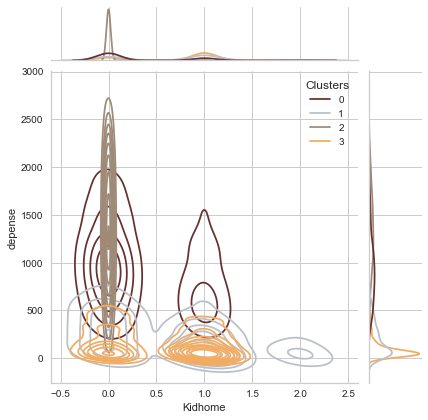

C:\Users\iatrade\anaconda3\lib\site-packages\seaborn\distributions.py:1077: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\iatrade\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 576x396 with 0 Axes>

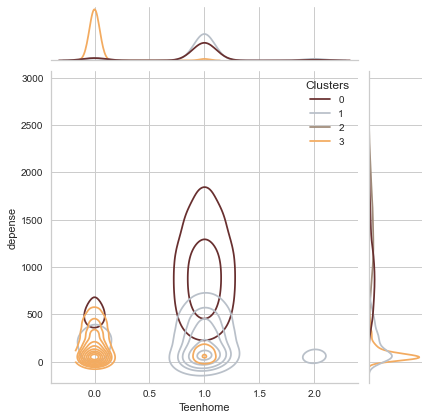

<Figure size 576x396 with 0 Axes>

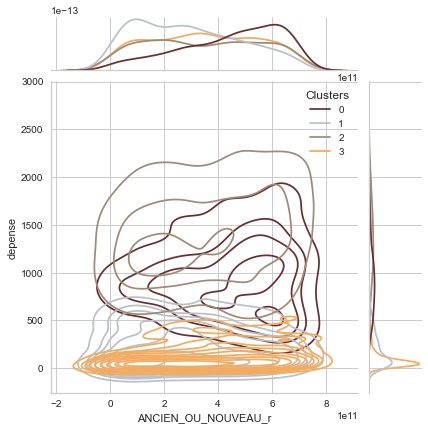

<Figure size 576x396 with 0 Axes>

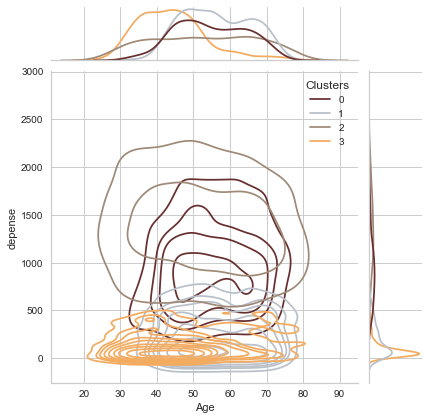

<Figure size 576x396 with 0 Axes>

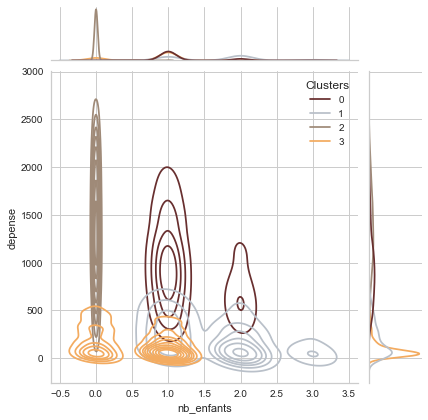

<Figure size 576x396 with 0 Axes>

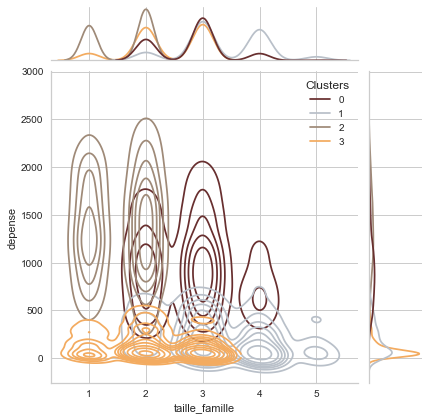

<Figure size 576x396 with 0 Axes>

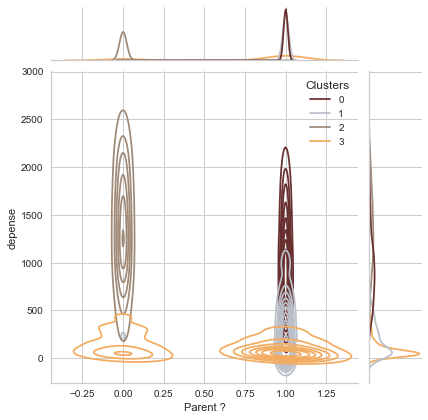

<Figure size 576x396 with 0 Axes>

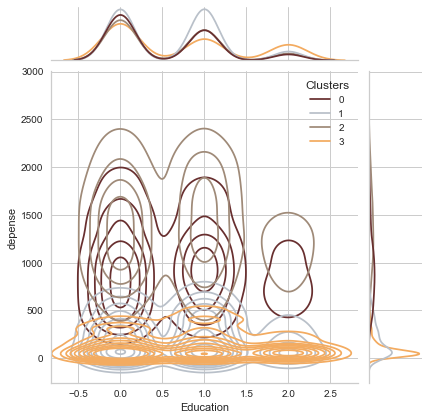

<Figure size 576x396 with 0 Axes>

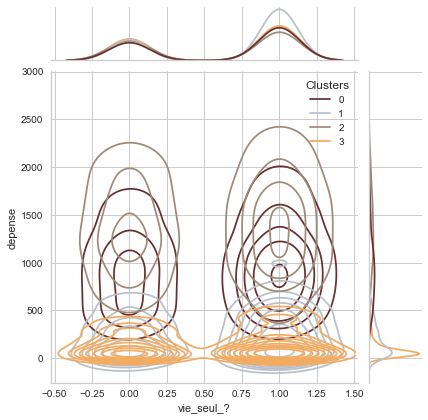

In [75]:
Personal = ["Kidhome","Teenhome","ANCIEN_OU_NOUVEAU_r", "Age", "nb_enfants", "taille_famille", "Parent ?", "Education","vie_seul_?"]

for i in Personal:
    plt.figure()
    sns.jointplot(x=data[i], y=data["depense"], hue =data["Clusters"], kind="kde", palette=pal)
    plt.show()

cluster 0 : 
   - sont définitivement un parent
   - au maximum avoir 4 membres dans la famille et au moins 2
   - les parents célibataires sont un sous-ensemble de ce groupe
   - la plupart ont un adolescent à la maison
   - relativement plus âgé
    
cluster 1 :
   - ne sont certainement pas un parent
   - au maximum sont 2 membres de la famille
   - une légère majorité de couples par rapport aux célibataires
   - couvrir toutes les pages
   - un groupe à revenu élevé

cluster 2 :
   - la majorité de ces personnes sont des parents 
   - au maximum ont 3 membres dans la famille
   - ils ont principalement un enfant (et non un adolescent, généralement)
    
cluster 3 :
   - ils sont définitivement un parent
   - au maximum sont 5 membres dans la famille et au moins 2
   - la majorité d’entre eux ont un adolescent à la maison
   - relativement plus âgé
   - un groupe à faible revenu